In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/My Drive/sales_data_updated.csv'
df = pd.read_csv(file_path)
df.head(5)

,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-01,10:11:40,5.0,29317,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,4.0,0.3,43.2,4.3,Medium,e_wallet
1,2018-01-01,22:30:44,7.0,42270,Male,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.1,139.5,13.9,High,money_order
2,2018-01-01,21:55:31,10.0,14563,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.1,120.5,12.0,High,credit_card
3,2018-01-01,13:57:15,9.0,58601,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.2,150.0,15.0,Critical,credit_card
4,2018-01-01,15:17:41,2.0,48342,Male,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.1,165.0,16.5,High,credit_card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date           51290 non-null  object 
 1   time                 51290 non-null  object 
 2   aging                51289 non-null  float64
 3   customer_id          51290 non-null  int64  
 4   gender               51290 non-null  object 
 5   device_type          51290 non-null  object 
 6   customer_login_type  51290 non-null  object 
 7   product_category     51290 non-null  object 
 8   product              51290 non-null  object 
 9   sales                51289 non-null  float64
 10  quantity             51288 non-null  float64
 11  discount             51289 non-null  float64
 12  profit               51290 non-null  float64
 13  shipping_cost        51289 non-null  float64
 14  order_priority       51288 non-null  object 
 15  payment_method       51290 non-null 

In [4]:
df["order_date"] = pd.to_datetime(df["order_date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_date           51290 non-null  datetime64[ns]
 1   time                 51290 non-null  object        
 2   aging                51289 non-null  float64       
 3   customer_id          51290 non-null  int64         
 4   gender               51290 non-null  object        
 5   device_type          51290 non-null  object        
 6   customer_login_type  51290 non-null  object        
 7   product_category     51290 non-null  object        
 8   product              51290 non-null  object        
 9   sales                51289 non-null  float64       
 10  quantity             51288 non-null  float64       
 11  discount             51289 non-null  float64       
 12  profit               51290 non-null  float64       
 13  shipping_cost        51289 non-

# ***1.***

***Побудуй гістограму для візуалізації розподілу прибутку (profit).***

***Проаналізуй, який характер розподілу значень загалом, які значення переважають.***

/tmp/ipython-input-2348575177.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="profit", bins=15, palette="viridis")


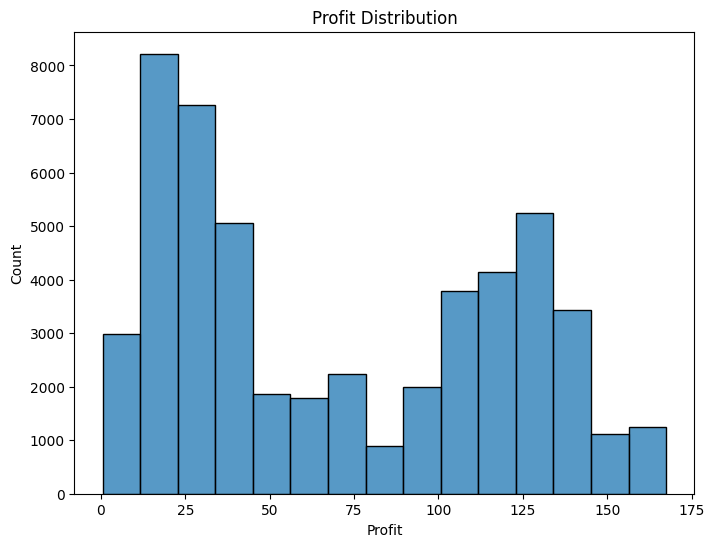

In [6]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x="profit", bins=15, palette="viridis")
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Count")

plt.show()

Розподіл несиметрийний. Має декілька піків:

* ~ прибуток 15-20($) зустрічається найчастіше;

* ~ 125($).

Високі прибутки 150-170($) зустрічаються рідко.



# ***2.***

**Побудуй окремо гістограми прибутку для продажів через веббраузер та мобільний додаток (device_type). Зроби це на одній візуалізації (використай параметр hue) та на окремих (параметр col).**

**Скористайся Google або ChatGPT для того, щоб дізнатися як працює параметр col.**

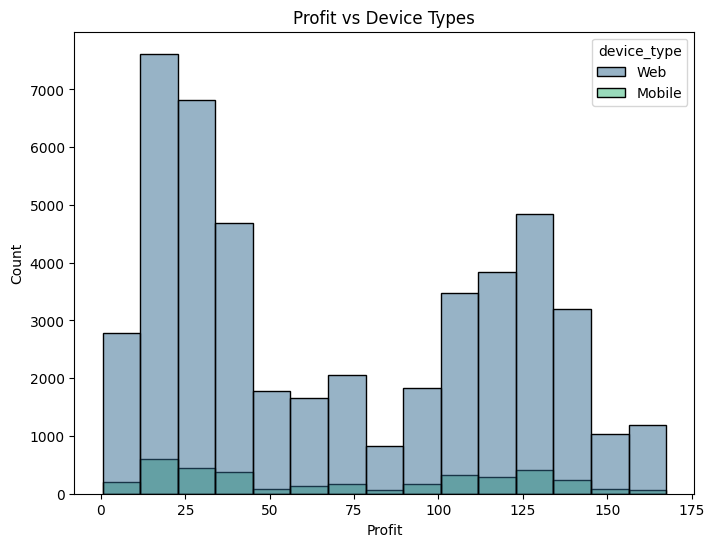

In [7]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x="profit", hue="device_type", bins=15, palette="viridis")
plt.title("Profit vs Device Types")
plt.xlabel("Profit")
plt.ylabel("Count")

plt.show()

/tmp/ipython-input-2966756876.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x="profit", col="device_type", bins=15, palette="viridis")


<Figure size 1000x800 with 0 Axes>

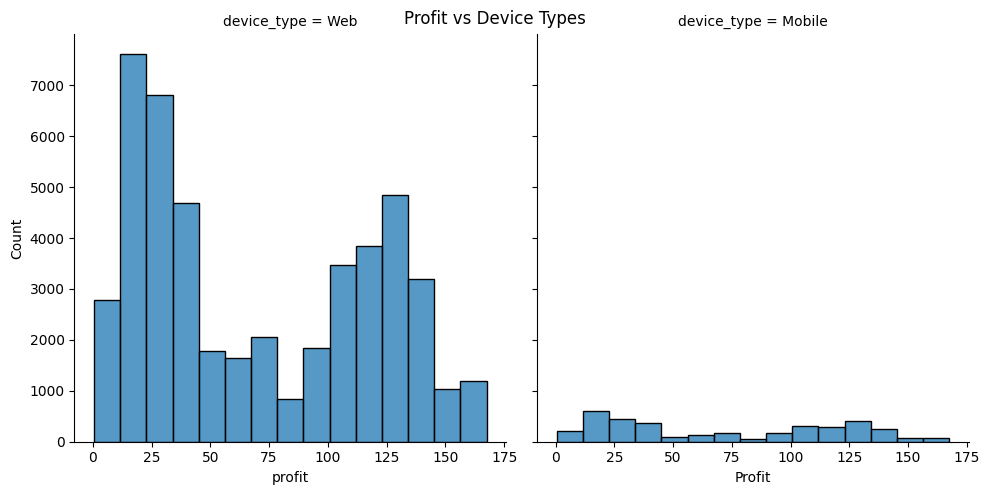

In [8]:
plt.figure(figsize=(10, 8))

sns.displot(data=df, x="profit", col="device_type", bins=15, palette="viridis")
plt.suptitle("Profit vs Device Types")
plt.xlabel("Profit")
plt.ylabel("")

plt.show()

# ***3.***



***Створи лінійний графік, який показує зміну прибутків (profit) у часі (order_date).***

***Перед цим потрібно переконатись у тому, що колонка order_date має відповідний тип даних. Це допоможе зрозуміти тенденцію покупок протягом зазначеного періоду. Якою є ця тенденція згідно з графіком? Запиши відповідь у текстовому полі.***

In [9]:
daily_sales = (df.groupby(df["order_date"].dt.to_period("M"))["profit"].sum().reset_index() )
daily_sales

,order_date,profit
0,2018-01,174573.6
1,2018-02,153288.2
2,2018-03,200936.8
3,2018-04,277832.2
4,2018-05,379386.3
5,2018-06,298300.1
6,2018-07,374391.6
7,2018-08,306904.0
8,2018-09,341558.1
9,2018-10,342368.5


In [10]:
daily_sales["order_date"] = daily_sales["order_date"].dt.to_timestamp()

<Figure size 1000x1000 with 0 Axes>

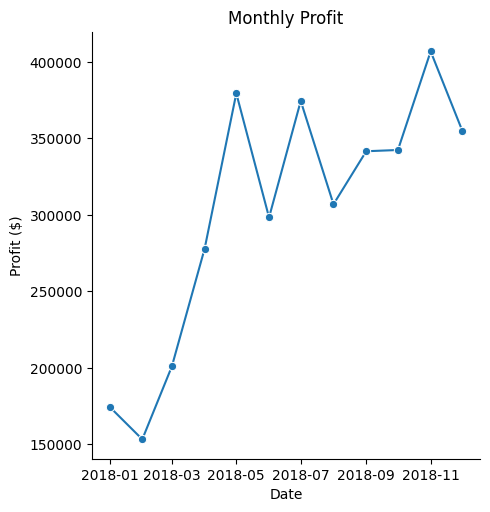

In [11]:
plt.figure(figsize=(10, 10))

sns.relplot(data=daily_sales, x="order_date", y="profit", kind="line", marker="o")
plt.title("Monthly Profit")
plt.xlabel("Date")
plt.ylabel("Profit ($)")

plt.show()

***Починаючи з березня місяця прибуток почав зростати. Ця тенденція зберіглася до травня.***

***Червень і далі: прибуток стає нестабільним, з коливаннями.***

# ***4.***

 ***Побудуй стовпчастий графік, що показує загальний прибуток за категоріями товарів (product_category).***

  ***Яка категорія найбільш прибуткова? Яка найменш прибуткова? Запиши відповідь у текстовому полі.***


In [12]:
sum_profit_by_category = df.groupby("product_category")["profit"].sum().sort_values(ascending=False).reset_index()
sum_profit_by_category

,product_category,profit
0,Fashion,2072623.9
1,Home & Furniture,880058.9
2,Auto & Accessories,484313.2
3,Electronic,174190.6


<Figure size 1000x800 with 0 Axes>

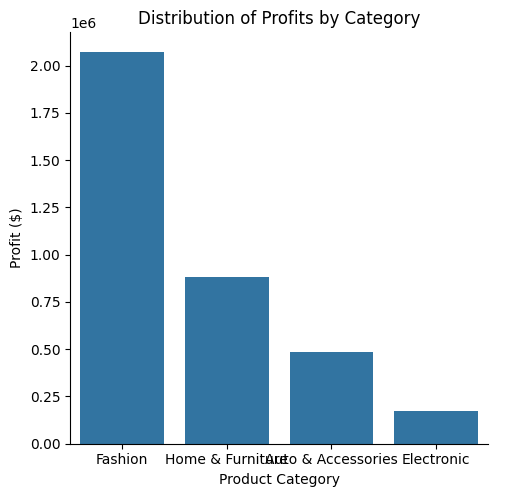

In [13]:
plt.figure(figsize=(10, 8))

sns.catplot(data=sum_profit_by_category, x='product_category', y='profit', kind="bar")
plt.title("Distribution of Profits by Category")
plt.xlabel("Product Category")
plt.ylabel("Profit ($)")
plt.show()

***Категорія продукції Fashiion має найбільші у середньому продажі***

***Найменьше продаж у категорії - Electronic***

# ***5.***

In [14]:
df

,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-01,10:11:40,5.0,29317,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,4.0,0.3,43.2,4.3,Medium,e_wallet
1,2018-01-01,22:30:44,7.0,42270,Male,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.1,139.5,13.9,High,money_order
2,2018-01-01,21:55:31,10.0,14563,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.1,120.5,12.0,High,credit_card
3,2018-01-01,13:57:15,9.0,58601,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.2,150.0,15.0,Critical,credit_card
4,2018-01-01,15:17:41,2.0,48342,Male,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.1,165.0,16.5,High,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-12-30,16:20:22,5.0,88891,Male,Web,Member,Home & Furniture,Sofas,67.0,1.0,0.4,33.5,3.4,Medium,credit_card
51286,2018-12-30,11:52:02,7.0,74259,Male,Web,Member,Home & Furniture,Curtains,34.0,5.0,0.3,6.8,0.7,Medium,credit_card
51287,2018-12-30,15:06:46,5.0,62596,Male,Web,Member,Home & Furniture,Umbrellas,70.0,1.0,0.2,35.0,3.5,Medium,money_order
51288,2018-12-30,15:36:49,1.0,77349,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,49.0,4.9,Medium,credit_card


***Використай параметр hue та стовпчик gender, щоб подивитись на загальні прибутки за категоріями у розрізі клієнтів-чоловіків та клієнтів-жінок.***

***Які висновки можна зробити?***

***Чи є відмінності у поведінці між двома групами клієнтів? Запиши відповідь у текстовому полі.***

<Figure size 800x600 with 0 Axes>

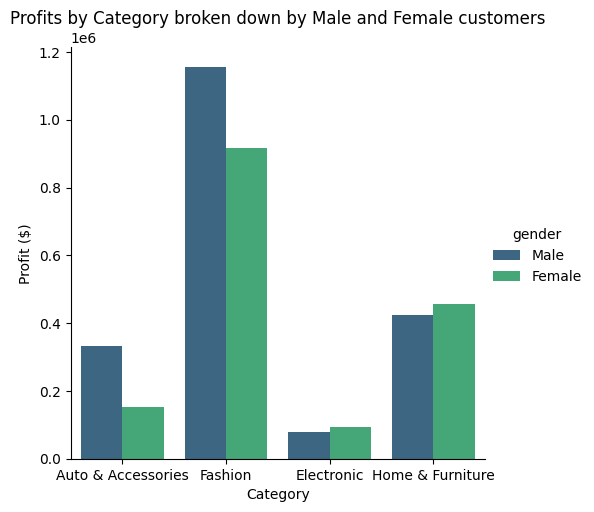

In [15]:
plt.figure(figsize=(8, 6))

sns.catplot(data=df, x="product_category", y="profit",  hue='gender',  kind="bar",  estimator=np.sum, palette="viridis", errorbar=("ci", False))
plt.title("Profits by Category broken down by Male and Female customers")
plt.xlabel("Category")
plt.ylabel("Profit ($)")

plt.show()

***Чоловіки більш схильні до особистих витрат, в категоріях товарів як Auto & Accessories та Fashion, ніж жінки.***

***Жінки, натомість, витрачають кошти в категоріях товарів – Electronic, Home & Furniture***